In [1]:
import numpy as np
import numpy.typing as npt

## 1. Vector Operations on Embeddings
In class we learned about the classic word embedding example of the relationship between the concepts queen, king, women and man. 

For this problem you will work with dummy vector encodings in numpy to work through this concept in code.

Given the below vector encodings of queen, women, and man create a vector encoding the concept of royalty and king.

*Note: You must use vector operation on the existing vectors to create the new vectors*

For 5 point extra credit create a 3D-plot showing the relationship between these vectors. These points will be added to your intial attempt and must be included in the intial attempt to recieve credit since you will likely get the solution in class.

In [2]:
queen = np.array([5, 6, 4])
women = np.array([1, 3, 2])
man = np.array([5, 5, 5])
royalty = queen - women
king = man + royalty



## 2. Vector Magnitude
In class we learned the formula for vector magintude. 

Create your own implimentation of `vector_magnitude` not using `numpy.linalg.norm` but instead using vector operations in numpy. Use the test and example vectors to check your solution. 

In [3]:
def vector_magnitude(np_vector: npt.NDArray) -> np.float64:
    np_vector_squared = np_vector ** 2
    sum_of_squares = np.sum(np_vector_squared)
    magnitude = np.sqrt(sum_of_squares)
    return magnitude

def test_vector_magnitude(np_vector: npt.NDArray) -> None:
    if vector_magnitude(np_vector) == np.linalg.norm(np_vector):
        print(f"Test passed for {np_vector}")
    else:
        print(f"Test failed for {np_vector}")


d1_vector = np.array([5])
d2_vector = np.array([3.2, 0.1])
d3_vector = np.array([-2, 2, 2])
d10_vector = np.random.randint(100, size=(10))

test_vector_magnitude(d1_vector)
test_vector_magnitude(d2_vector)
test_vector_magnitude(d3_vector)
test_vector_magnitude(d10_vector)

Test passed for [5]
Test passed for [3.2 0.1]
Test passed for [-2  2  2]
Test passed for [37 58 52 20 57 68 14 23 84 82]


## 3. Unit Vectors
Using your implimentation of `vector_magnitude` above create a function `create_unit_vector` which creates a unit vector from a `np.array`. Create another function `test_create_unit_vector` following the pattern in `test_vector_magnitude` that tests the static vectors above with the corrisponding unit vectors defined below.

Hint: Use np.allclose instead of == . Explain why this is needed.

In [4]:
d1_unit_vector = np.array([1.])
d2_unit_vector = np.array([0.99951208, 0.03123475])
d3_unit_vector = np.array([-0.57735027,  0.57735027,  0.57735027])

#Impliment vector_magnitude and test_vector_magnitude here
def create_unit_vector(np_vector: npt.NDArray) -> npt.NDArray:
    magnitude = vector_magnitude(np_vector)
    return np_vector / magnitude

def test_create_unit_vector(np_vector: npt.NDArray) -> None:
    result = create_unit_vector(np_vector)
    if np.allclose(result, np_vector / np.linalg.norm(np_vector)):
        print(f"Test passed for {np_vector}")
    else:
        print(f"Test failed for {np_vector}")

# you use np.allclose instead of ==
# because of floating point math is not exact


## 4. Dot Product
Again there exists a function in numpy that calculates the dot product formula we learrned in class, `numpy.dot`. For this problem you will write your on implimentation of the dot product using the formula from class and basic vector operations. You will alo need to create a test to compare your implimentation to `numpy.dot` and create 3 test cases that follow the guidance below.

1. The first test case should perform the dot product of a 3d vector with itself
2. The second test case should include integers and floats
3. For the third test case think of another edge case you might want to test against


In [5]:
def dot_product(v1: npt.NDArray, v2: npt.NDArray) -> np.float64:
    return np.sum(v1 * v2)

def test_dot_product(v1: npt.NDArray, v2: npt.NDArray) -> None:
    result = dot_product(v1, v2)
    expected = np.dot(v1, v2)

    if np.allclose(result, expected):
        print(f"Test passed for {v1} · {v2}")
    else:
        print(f"Test failed for {v1} · {v2}")

## 5. Predictions with dot products
Using linear regression we created the following model to predict the weight of a cat given the length and height. 

$$weight  = 0.23 * length + 1.07 * height + 3.412$$

Impliment a function `predict_weight` which will take in a 2d vector of a cat's length and height and will output the predicted weight of the cat. 

Also create a function `prediction_error` which will take the predicted weight and the actual weight of the cat and give the absolute value of the error between the two.

Use these functions to predict the weights of the cats below and figure out the error the predicted weights compared to the actual weights. Print out the results. 

In [6]:
cat_1_array = np.array([28.57, 10.435])
cat_1_actual_weight = 24.21

cat_2_array = np.array([19.04, 6.93])
cat_2_actual_weight = 13.831

def predict_weight(cat: npt.NDArray) -> np.float64:
    return (cat[0] * 0.23) + (cat[1] * 1.07) + 3.412


def prediction_error(cat: npt.NDArray, actual_weight: float) -> float:
    predicted_weight = predict_weight(cat)
    error = abs(predicted_weight - actual_weight)
    return error

prediction_error(cat_1_array, cat_1_actual_weight)
prediction_error(cat_2_array, cat_2_actual_weight)

np.float64(1.3752999999999993)

## 6. Linear Weighted Combinations
In class I showed the below code for calculating linear weighted combinations. 

```
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])
l1*v1 + l2*v2 + l3*v3
```

Rewrite this code into a function called `linear_comb_loop` that will accept as input the scalars in a list and the vectors as elements in a list. Such that:

```
scalars_array = np.array([1, 2, -3])
vectors_array = np.array([[4,5,1], [-4,0,-4], [1,3,2]])

linear_comb_loop(scalars_array, vectors_array)
```

In this function use a for loop to implement the linear weighted combination operation. Initialize the output vector using np.zeros(). Confirm that you get the same result as in the previous code.

For 5 point extra credit create a second implementation that vectorizes this solution. Run some test that will check which implementation runs faster. These points will be added to your intial attempt and must be included in the intial attempt to recieve credit since you will likely get the solution in class.


In [7]:
def linear_comb_loop(scalars: npt.NDArray, vectors: npt.NDArray) -> npt.NDArray:
    # vectors.shape[1] is 3 because each vector has 3 elements
    # result is initialized to a zero vector of the same dimension
    result = np.zeros(vectors.shape[1])
    for i in range(len(scalars)):
        result += scalars[i] * vectors[i]
    return result

l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])
expected = l1*v1 + l2*v2 + l3*v3

scalars_array = np.array([1, 2, -3])
vectors_array = np.array([
    [4, 5, 1],
    [-4, 0, -4],
    [1, 3, 2]
])

loop_result = linear_comb_loop(scalars_array, vectors_array)

print(np.allclose(expected, loop_result))

True


## 7. Create a Basis
In this exercise, you will draw random points in subspaces. This will help reinforce the idea that subspaces comprise any linear weighted combination of the spanning vectors. Define a vector set containing one vector [1, 3]. Then create 100 numbers drawn randomly from a uniform distribution between −4 and +4. Those are your random scalars. Multiply the random scalars by the basis vector to create 100 random points in the subspace. Plot those points using `plot_vectors`.



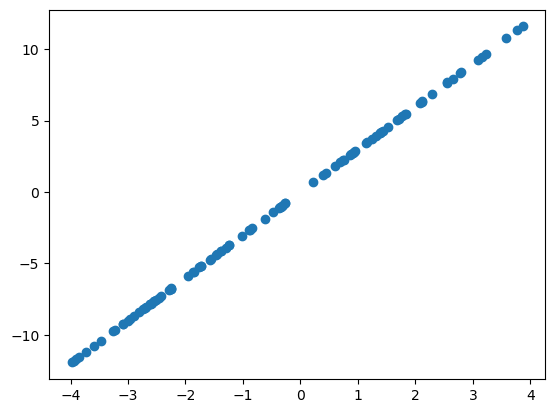

In [8]:
import matplotlib.pyplot as plt
vectors = []

def plot_vectors(vectors):
    plt.scatter(*zip(*vectors))
    plt.show()

basis_vector = np.array([1, 3])
random_scalars = np.random.uniform(-4, 4, 100)

for scalar in random_scalars:
    vectors.append(scalar * basis_vector)
    
plot_vectors(vectors)

## 8. Extra Credit (10pts): Create a 3d Basis
This problem will not be graded on the final attempt and is only extra credit on the intial attempt and one of the problems a student can present in class for their participation credit that week.
These points will be added to your intial attempt and must be included in the intial attempt to recieve credit since you will likely get the solution in class.

Next, repeat the procedure but using two vectors in 3 dimensional space: [3, 5, 1] and [0, 2, 2]. Note that you need 100 × 2 random scalars for 100 points and two vectors. The resulting random dots will be on a plane. Plot this vectors on a 3 dimensional graph.


## 9. Calculating Correlations 

Write two Python function that takes two vectors as input. The first one will calculate the Pearson correlation coefficient and the second cosine similarity value. Write code that follows the formulas presented in class; don’t simply call `np.corrcoef` and `spatial.distance.cosine`. 

Write the following tests:
1. `test_persons` which will test that your implimentation of the Pearson's correlation coefficient matches `np.corrcoef`.
2. `test_cosine` which will test that your implimentation of the cosine similarity value matches `spatial.distance.cosine`.
3. A test which will check if your implimentation of the Pearson's correlation coefficient matches your implimentation of the cosine similarity value. 


Create two test cases:
1. Mean centered vectors
2. Non-mean centered vectors

Run all three tests on the two test cases and describe what you find.

In [3]:
from scipy import spatial



def pearson_corr(v1, v2):
    """
    I could not find the formula for pearson correclation coefficient,
    so I impletement what I found in this link

    https://www.geeksforgeeks.org/python/pearson-correlation-in-data-science/
    
    """
    v1 = np.asarray(v1, dtype=float)
    v2 = np.asarray(v2, dtype=float)

    v1_minus_mean1 = v1 - v1.mean()
    v2_minus_mean2 = v2 - v2.mean()

    numerator = np.sum(v1_minus_mean1 * v2_minus_mean2)
    denom = np.sqrt(np.sum(v1_minus_mean1**2) * np.sum(v2_minus_mean2**2))

    return numerator / denom

def cosine_similarity(v1, v2):
    """
    I could not find the formula for cosine similarity,
    so I impletement what I found in this link

    https://www.geeksforgeeks.org/dbms/cosine-similarity/

    I also learned about np.linalg.norm here

    https://www.geeksforgeeks.org/python/find-a-matrix-or-vector-norm-using-numpy/


    """
    v1 = np.asarray(v1, dtype=float)
    v2 = np.asarray(v2, dtype=float)

    numerator = float(np.dot(v1, v2))
    denom = float(np.linalg.norm(v1) * np.linalg.norm(v2))

    
    return numerator / denom

def test_persons(x, y):
    
    mine = pearson_corr(x, y)
    expected= np.corrcoef(np.asarray(x, float), np.asarray(y, float))
    return np.isclose(mine, expected)

def test_cosine(v1, v2):
    mine = cosine_similarity(v1, v2)
    expected = 1 - spatial.distance.cosine(v1, v2)
    return np.isclose(mine, expected)

def test_pearson_eqauls_cosine(v1, v2):
    pearson = pearson_corr(v1, v2)
    cosine = cosine_similarity(v1, v2)
    return np.isclose(pearson, cosine)

test1 = np.array([2, 4, 6, 8, 10], dtype=float)
test2 = np.array([1, 2, 1, 3, 5], dtype=float)

print(test_persons(test1, test2))
print(test_cosine(test1, test2))
print(test_pearson_eqauls_cosine(test1, test2))


[[False  True]
 [ True False]]
True
False
